# Benchmark Bernoulli Markovian Tree model

This notebook aims at verifying the convergence and benchmarking the Bernoulli Markovian Tree Model.

## Artificial dataset

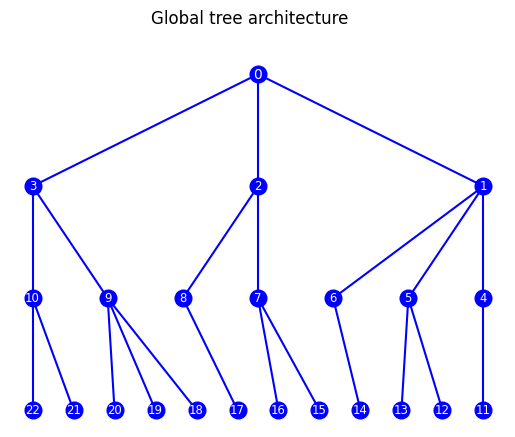

In [1]:
from src.utils import Tree
import matplotlib.pyplot as plt

# Define a global tree architecture

global_adjacency_matrix = [
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 0
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 1
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 3
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 4
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 5
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # node 6
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], # node 7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], # node 8
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], # node 9
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], # node 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 14
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 15
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 16
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 17
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 18
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 19
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 20
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 21
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 22
]

global_tree = Tree(global_adjacency_matrix)
global_tree.plot(title="Global tree architecture")
plt.show()

In [2]:
from src.model import BernoulliTreePrior, DirichletAbundanceTreePosterior
import numpy as np

# Generate the dataset based on the previous architecture
dataset_size = 1000

# First we define the parameters of the model, which are our objectives
activation_probabilities = {
    0:1,
    1:0.999,
    2:0.998,
    3:0.995,
    4:0.45,
    5:0.75,
    6:0.8,
    7:0.94,
    8:0.25,
    9:0.9,
    10:0.65,
    11:0.95,
    12:0.76,
    13:0.5,
    14:0.76,
    15:0.67,
    16:0.1,
    17:0.6,
    18:0.2,
    19:0.7,
    20:0.53,
    21:0.9,
    22:0.2
}

dirichlet_parameters = {}
for i, adjacency in enumerate(global_tree.adjacent_matrix):
    countChildren = np.sum(adjacency)
    if countChildren > 1:
        dirichlet_parameters[i] = np.abs(np.random.rand(countChildren))

def generate_dataset(dataset_size):

    prior = BernoulliTreePrior(global_tree, activation_probabilities)
    posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters)

    trees = []

    for i in range(dataset_size):
        sampled_tree = prior.sample_tree()
        sampled_abundance_tree = posterior.sample_abundance_tree(sampled_tree)
        trees.append(sampled_abundance_tree)

    return trees

trees = generate_dataset(dataset_size)

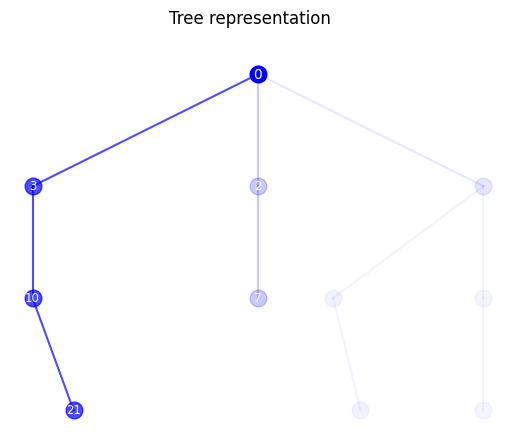

In [3]:
# plot a few trees
n_plot = 1
for i in range(n_plot):
    tree = trees[i]
    tree.plot()
plt.show()

## Learning the distributions over the artificial data

node index: 1  | pi_k_l = 999  | normalization = 1000
node index: 2  | pi_k_l = 999  | normalization = 1000
node index: 3  | pi_k_l = 994  | normalization = 1000
node index: 4  | pi_k_l = 432  | normalization = 999
node index: 5  | pi_k_l = 763  | normalization = 999
node index: 6  | pi_k_l = 804  | normalization = 999
node index: 11  | pi_k_l = 409  | normalization = 432
node index: 12  | pi_k_l = 579  | normalization = 763
node index: 13  | pi_k_l = 387  | normalization = 763
node index: 14  | pi_k_l = 596  | normalization = 804
node index: 7  | pi_k_l = 937  | normalization = 999
node index: 8  | pi_k_l = 254  | normalization = 999
node index: 15  | pi_k_l = 615  | normalization = 937
node index: 16  | pi_k_l = 90  | normalization = 937
node index: 17  | pi_k_l = 141  | normalization = 254
node index: 9  | pi_k_l = 895  | normalization = 994
node index: 10  | pi_k_l = 666  | normalization = 994
node index: 18  | pi_k_l = 152  | normalization = 895
node index: 19  | pi_k_l = 605  | n

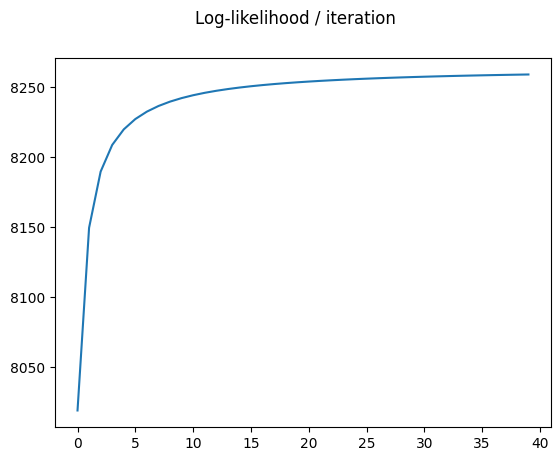

In [4]:
# Using the artificial dataset, we try to compute the p(X,T)

prior = BernoulliTreePrior(global_tree, activation_probabilities={})
posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={})

prior.fit(trees)
ll = posterior.fit(trees, n_iter=40)

fig, axs = plt.subplots()
fig.suptitle("Log-likelihood / iteration")
axs.plot(ll)

We repeat the experiments a several times to look at the general convergence profile.

* Experiment 0
node index: 1  | pi_k_l = 999  | normalization = 1000
node index: 2  | pi_k_l = 999  | normalization = 1000
node index: 3  | pi_k_l = 994  | normalization = 1000
node index: 4  | pi_k_l = 432  | normalization = 999
node index: 5  | pi_k_l = 763  | normalization = 999
node index: 6  | pi_k_l = 804  | normalization = 999
node index: 11  | pi_k_l = 409  | normalization = 432
node index: 12  | pi_k_l = 579  | normalization = 763
node index: 13  | pi_k_l = 387  | normalization = 763
node index: 14  | pi_k_l = 596  | normalization = 804
node index: 7  | pi_k_l = 937  | normalization = 999
node index: 8  | pi_k_l = 254  | normalization = 999
node index: 15  | pi_k_l = 615  | normalization = 937
node index: 16  | pi_k_l = 90  | normalization = 937
node index: 17  | pi_k_l = 141  | normalization = 254
node index: 9  | pi_k_l = 895  | normalization = 994
node index: 10  | pi_k_l = 666  | normalization = 994
node index: 18  | pi_k_l = 152  | normalization = 895
node index: 19  | pi

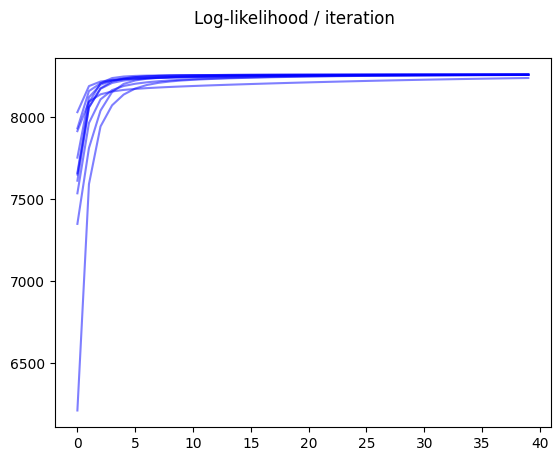

In [5]:
# Using the artificial dataset, we try to compute the p(X,T)

fig, axs = plt.subplots()
fig.suptitle("Log-likelihood / iteration")

n_repeat = 10

prior_list = []
posterior_list = []

for _ in range(n_repeat):
    print("* Experiment", _)
    prior = BernoulliTreePrior(global_tree, activation_probabilities={})
    posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={})

    prior.fit(trees)
    ll = posterior.fit(trees, n_iter=40)

    prior_list.append(prior)
    posterior_list.append(posterior)

    axs.plot(ll, color='blue', alpha=0.5)

plt.show()

Now we would like to compare the fitted distribution to the true one.

proba | node 0 : 1  -  1
proba | node 1 : 0.999  -  0.999
proba | node 2 : 0.998  -  0.999
proba | node 3 : 0.995  -  0.994
proba | node 4 : 0.45  -  0.43243243243243246
proba | node 5 : 0.75  -  0.7637637637637638
proba | node 6 : 0.8  -  0.8048048048048048
proba | node 7 : 0.94  -  0.9379379379379379
proba | node 8 : 0.25  -  0.25425425425425424
proba | node 9 : 0.9  -  0.9004024144869215
proba | node 10 : 0.65  -  0.670020120724346
proba | node 11 : 0.95  -  0.9467592592592593
proba | node 12 : 0.76  -  0.7588466579292268
proba | node 13 : 0.5  -  0.5072083879423329
proba | node 14 : 0.76  -  0.7412935323383084
proba | node 15 : 0.67  -  0.656350053361793
proba | node 16 : 0.1  -  0.096051227321238
proba | node 17 : 0.6  -  0.5551181102362205
proba | node 18 : 0.2  -  0.16983240223463686
proba | node 19 : 0.7  -  0.6759776536312849
proba | node 20 : 0.53  -  0.5162011173184358
proba | node 21 : 0.9  -  0.9009009009009009
proba | node 22 : 0.2  -  0.1906906906906907
alpha | node 0 : 

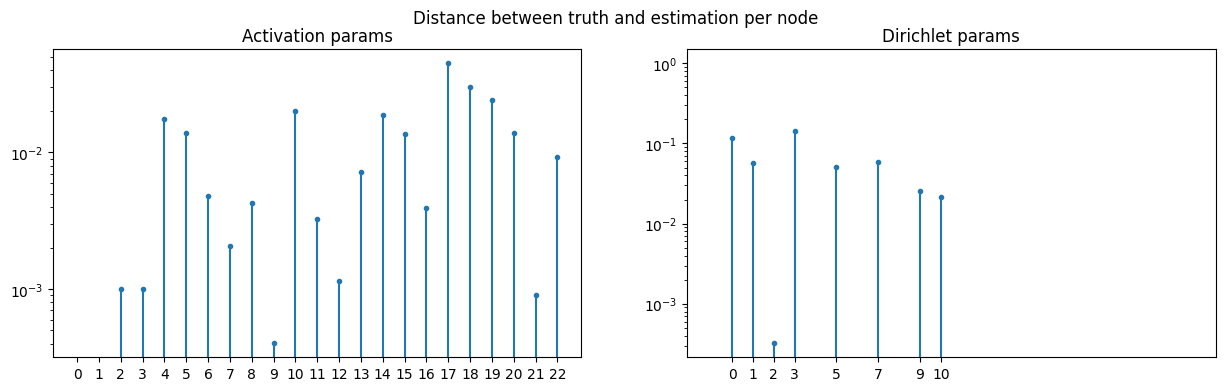

In [6]:
def compute_params_difference(prior, posterior, printValues=False):
    # We compute the distance between the activation probabilities
    activation_proba_difference = np.zeros(len(activation_probabilities.values()))
    for node_index in activation_probabilities.keys():
        activation_proba_difference[node_index] = np.abs(activation_probabilities[node_index] - prior.nodes[node_index].activationProba)
        if printValues:
            print("proba | node", node_index, ":", activation_probabilities[node_index], " - ", prior.nodes[node_index].activationProba)

    # Then we compute the distance between the alpha parameters of the dirichlet distribution
    dirichlet_params_difference = np.zeros(len(activation_probabilities.values()))
    for node_index in dirichlet_parameters.keys():
        dirichlet_params_difference[node_index] = np.linalg.norm(
            np.array(dirichlet_parameters[node_index]) - np.array(posterior.dirichlet_params[node_index]),
            ord=1
        )
        if printValues:
            print("alpha | node", node_index, ":", dirichlet_parameters[node_index], " - ", posterior.dirichlet_params[node_index])

    return activation_proba_difference, dirichlet_params_difference

activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior, printValues=True)
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].plot(activation_proba_difference, marker=".", linestyle="")
axs[0].set_xticks(np.arange(0, len(activation_proba_difference)))
for node_index, diff in enumerate(activation_proba_difference):
    axs[0].vlines(x = node_index, ymin=0, ymax = diff, color="C0")
axs[1].plot(dirichlet_params_difference, marker=".", linestyle="")
dirichlet_xaxis = []
for node in global_tree.nodes:
    if node.countChildren() > 1:
        dirichlet_xaxis.append((node.index))
axs[1].set_xticks(dirichlet_xaxis)
for node_index, diff in enumerate(dirichlet_params_difference):
    axs[1].vlines(x = node_index, ymin=0, ymax = diff, color="C0")
axs[0].set_title("Activation params")
axs[1].set_title("Dirichlet params")
axs[1].plot([-1], [1])
axs[1].set_yscale("log")
axs[0].set_yscale("log")
fig.suptitle("Distance between truth and estimation per node")
plt.show()

We also make these converence error profiles for several models

proba | node 0 : 1  -  1
proba | node 1 : 0.999  -  0.999
proba | node 2 : 0.998  -  0.999
proba | node 3 : 0.995  -  0.994
proba | node 4 : 0.45  -  0.43243243243243246
proba | node 5 : 0.75  -  0.7637637637637638
proba | node 6 : 0.8  -  0.8048048048048048
proba | node 7 : 0.94  -  0.9379379379379379
proba | node 8 : 0.25  -  0.25425425425425424
proba | node 9 : 0.9  -  0.9004024144869215
proba | node 10 : 0.65  -  0.670020120724346
proba | node 11 : 0.95  -  0.9467592592592593
proba | node 12 : 0.76  -  0.7588466579292268
proba | node 13 : 0.5  -  0.5072083879423329
proba | node 14 : 0.76  -  0.7412935323383084
proba | node 15 : 0.67  -  0.656350053361793
proba | node 16 : 0.1  -  0.096051227321238
proba | node 17 : 0.6  -  0.5551181102362205
proba | node 18 : 0.2  -  0.16983240223463686
proba | node 19 : 0.7  -  0.6759776536312849
proba | node 20 : 0.53  -  0.5162011173184358
proba | node 21 : 0.9  -  0.9009009009009009
proba | node 22 : 0.2  -  0.1906906906906907
alpha | node 0 : 

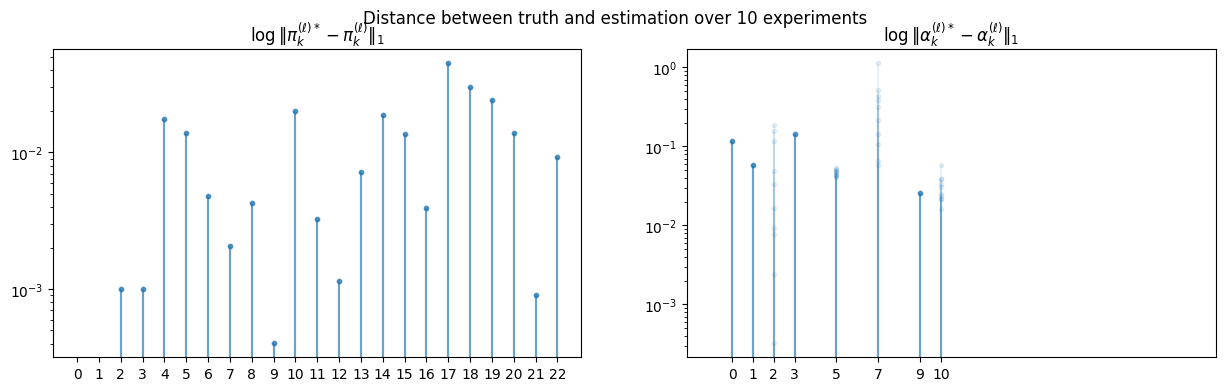

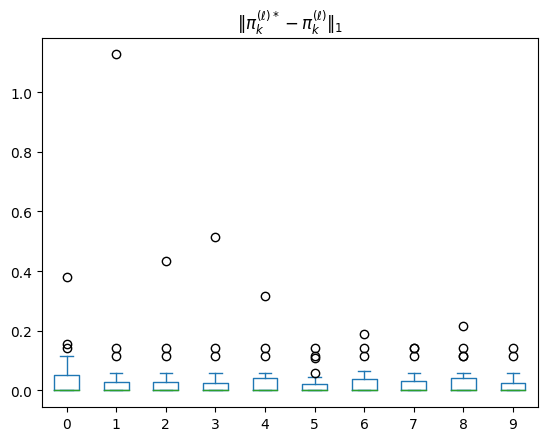

In [7]:
import pandas as pd

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
alpha = 0.1

df_dirichlet_params_difference = {}

for i in range(len(prior_list)):
    prior = prior_list[i]
    posterior = posterior_list[i]
    activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior, printValues=True)
    df_dirichlet_params_difference[i] = dirichlet_params_difference
    axs[0].plot(activation_proba_difference, marker=".", linestyle="", color='C0', alpha=alpha)
    axs[0].set_xticks(np.arange(0, len(activation_proba_difference)))
    for node_index, diff in enumerate(activation_proba_difference):
        axs[0].vlines(x = node_index, ymin=0, ymax = diff, color="C0", alpha=alpha)
    axs[1].plot(dirichlet_params_difference, marker=".", linestyle="", color="C0", alpha=alpha)
    dirichlet_xaxis = []
    for node in global_tree.nodes:
        if node.countChildren() > 1:
            dirichlet_xaxis.append((node.index))
    axs[1].set_xticks(dirichlet_xaxis)
    for node_index, diff in enumerate(dirichlet_params_difference):
        axs[1].vlines(x = node_index, ymin=0, ymax = diff, color="C0", alpha=alpha)
    axs[0].set_title("$\log \Vert \pi_k^{(\ell)*} - \pi_k^{(\ell)} \Vert_1$")
    axs[1].set_title("$\log \Vert \\alpha_k^{(\ell)*} - \\alpha_k^{(\ell)} \Vert_1$")
    axs[1].plot([-1], [1])
    axs[1].set_yscale("log")
    axs[0].set_yscale("log")
fig.suptitle(f"Distance between truth and estimation over {len(prior_list)} experiments")

plt.show()

<AxesSubplot: title={'center': '$\\Vert \\pi_k^{(\\ell)*} - \\pi_k^{(\\ell)} \\Vert_1$'}>

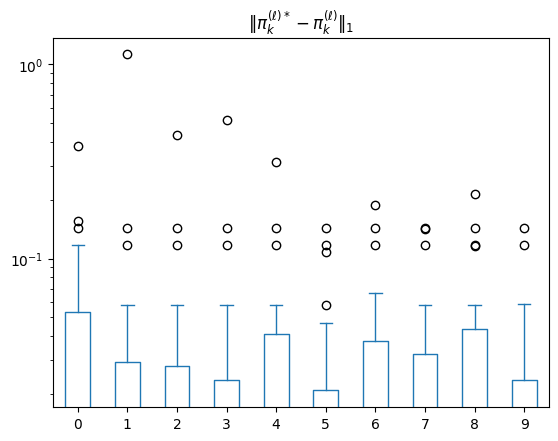

In [8]:
df_dirichlet_params_difference = pd.DataFrame(df_dirichlet_params_difference)
df_dirichlet_params_difference.plot(kind='box', title='$\Vert \pi_k^{(\ell)*} - \pi_k^{(\ell)} \Vert_1$', logy=True)

### Convergence per iteration

We can then plot the evolution of the distance per iteration

node index: 1  | pi_k_l = 999  | normalization = 1000
node index: 2  | pi_k_l = 999  | normalization = 1000
node index: 3  | pi_k_l = 994  | normalization = 1000
node index: 4  | pi_k_l = 432  | normalization = 999
node index: 5  | pi_k_l = 763  | normalization = 999
node index: 6  | pi_k_l = 804  | normalization = 999
node index: 11  | pi_k_l = 409  | normalization = 432
node index: 12  | pi_k_l = 579  | normalization = 763
node index: 13  | pi_k_l = 387  | normalization = 763
node index: 14  | pi_k_l = 596  | normalization = 804
node index: 7  | pi_k_l = 937  | normalization = 999
node index: 8  | pi_k_l = 254  | normalization = 999
node index: 15  | pi_k_l = 615  | normalization = 937
node index: 16  | pi_k_l = 90  | normalization = 937
node index: 17  | pi_k_l = 141  | normalization = 254
node index: 9  | pi_k_l = 895  | normalization = 994
node index: 10  | pi_k_l = 666  | normalization = 994
node index: 18  | pi_k_l = 152  | normalization = 895
node index: 19  | pi_k_l = 605  | n

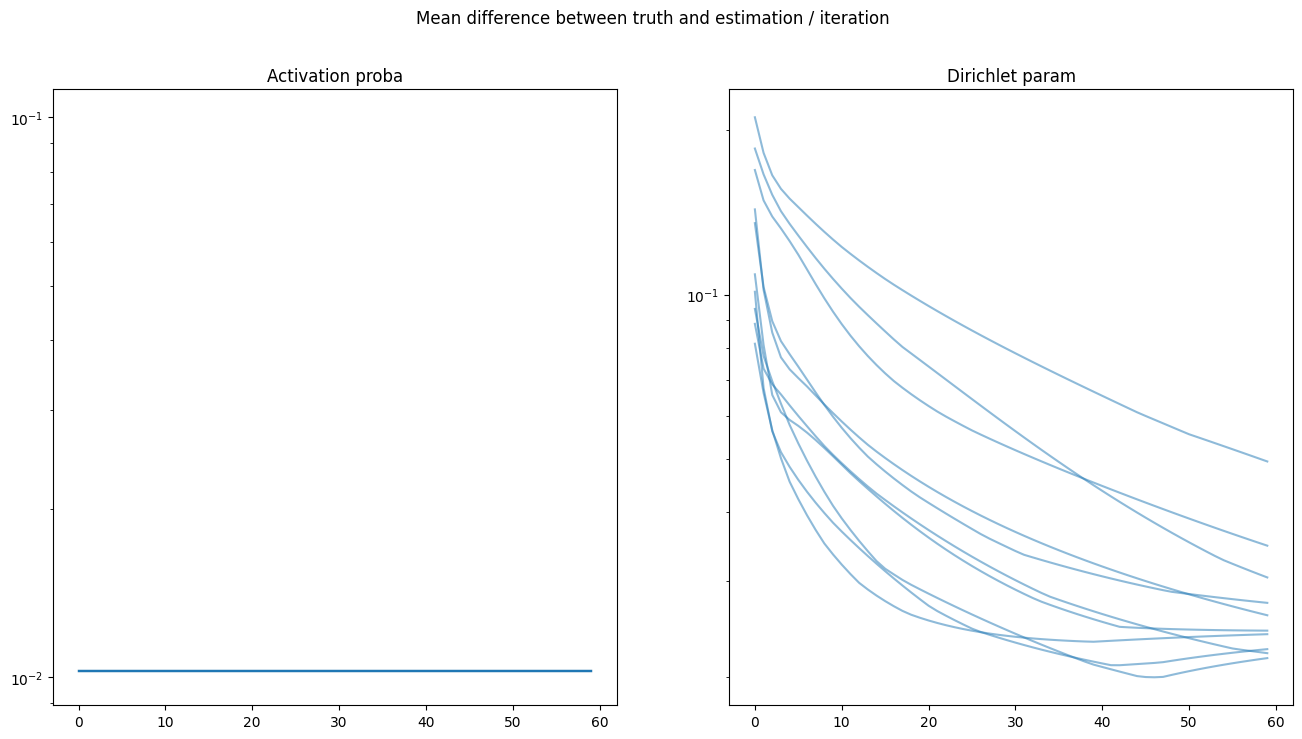

In [9]:
max_iter = 60

prior = BernoulliTreePrior(global_tree, activation_probabilities={})
posterior_list = [DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={}) for _ in range(n_repeat)]

prior.fit(trees)

activation_proba_mean_difference = np.zeros((n_repeat, max_iter))
dirichlet_params_mean_difference = np.zeros((n_repeat, max_iter))

for i in range(max_iter):

    for k, posterior in enumerate(posterior_list):
        posterior.fit(trees, n_iter=1)
        activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior)

        activation_proba_mean_difference[k][i] = activation_proba_difference.mean()
        dirichlet_params_mean_difference[k][i] = dirichlet_params_difference.mean()

fig, axs = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("Mean difference between truth and estimation / iteration")
axs[0].set_title("Activation proba")
axs[1].set_title("Dirichlet param")
for k in range(n_repeat):
    axs[0].plot(activation_proba_mean_difference[k], color='C0', alpha=0.5)
    axs[1].plot(dirichlet_params_mean_difference[k], color='C0', alpha=0.5)
axs[0].set_yscale('log')
axs[1].set_yscale('log')

### Convergence per sample

In [9]:
max_size = 2000
step = 100
n_repeat = 10

trees = generate_dataset(max_size)
assert (len(trees) == max_size)

prior_list_seed = [BernoulliTreePrior(global_tree, activation_probabilities=activation_probabilities) for _ in range(n_repeat)]
posterior_list_seed = [DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={}) for _ in range(n_repeat)]

df_activation_proba = {}
df_dirichlet_params = {}

activation_proba_mean_difference = np.zeros((n_repeat, max_size//step))
dirichlet_params_mean_difference = np.zeros((n_repeat, max_size//step))

i = 0
size = step
tested_sizes = []
while size <= max_size:
    print("Experiment: ", size)
    prior_list = [BernoulliTreePrior(global_tree, activation_probabilities=prior.getActivationProbabilities()) for prior in prior_list_seed]
    posterior_list = [DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters=posterior.dirichlet_params) for posterior in posterior_list_seed]

    list_activation_proba_diff = []
    list_dirichlet_params_diff = []

    for k in range(n_repeat):
        prior = prior_list[k]
        posterior = posterior_list[k]

        prior.fit(trees[0:size])
        posterior.fit(trees[0:size], n_iter=40)

        activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior)

        list_activation_proba_diff.append(activation_proba_difference)
        list_dirichlet_params_diff.append(dirichlet_params_difference)

        activation_proba_mean_difference[k][i] = activation_proba_difference.mean()
        dirichlet_params_mean_difference[k][i] = dirichlet_params_difference.mean()

    df_activation_proba[size] = list_activation_proba_diff
    df_dirichlet_params[size] = list_dirichlet_params_diff

    tested_sizes.append(size)
    size += step
    i += 1

Experiment:  100
node index: 1  | pi_k_l = 100  | normalization = 100
node index: 2  | pi_k_l = 100  | normalization = 100
node index: 3  | pi_k_l = 99  | normalization = 100
node index: 4  | pi_k_l = 43  | normalization = 100
node index: 5  | pi_k_l = 74  | normalization = 100
node index: 6  | pi_k_l = 83  | normalization = 100
node index: 11  | pi_k_l = 41  | normalization = 43
node index: 12  | pi_k_l = 56  | normalization = 74
node index: 13  | pi_k_l = 32  | normalization = 74
node index: 14  | pi_k_l = 64  | normalization = 83
node index: 7  | pi_k_l = 95  | normalization = 100
node index: 8  | pi_k_l = 27  | normalization = 100
node index: 15  | pi_k_l = 67  | normalization = 95
node index: 16  | pi_k_l = 10  | normalization = 95
node index: 17  | pi_k_l = 15  | normalization = 27
node index: 9  | pi_k_l = 92  | normalization = 99
node index: 10  | pi_k_l = 64  | normalization = 99
node index: 18  | pi_k_l = 20  | normalization = 92
node index: 19  | pi_k_l = 65  | normalization

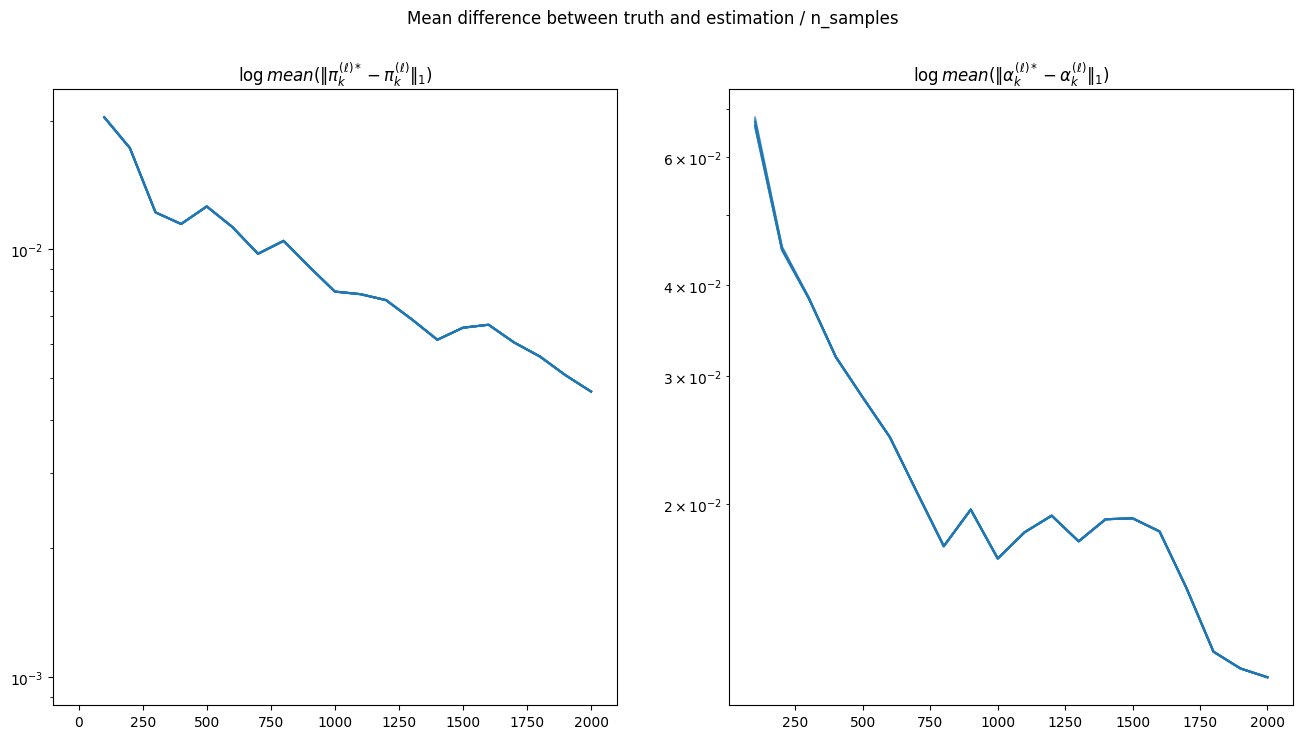

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("Mean difference between truth and estimation / n_samples")
axs[0].set_title("$\log mean(\Vert \pi_k^{(\ell)*} - \pi_k^{(\ell)} \Vert_1)$")
axs[1].set_title("$\log mean(\Vert \\alpha_k^{(\ell)*} - \\alpha_k^{(\ell)} \Vert_1)$")
for k in range(n_repeat):
    axs[0].plot(tested_sizes, activation_proba_mean_difference[k], color='C0', alpha=0.5)
    axs[1].plot(tested_sizes, dirichlet_params_mean_difference[k], color='C0', alpha=0.5)
axs[0].set_yscale('log')
axs[0].plot(0, 0.1*10e-3)
axs[1].set_yscale('log')

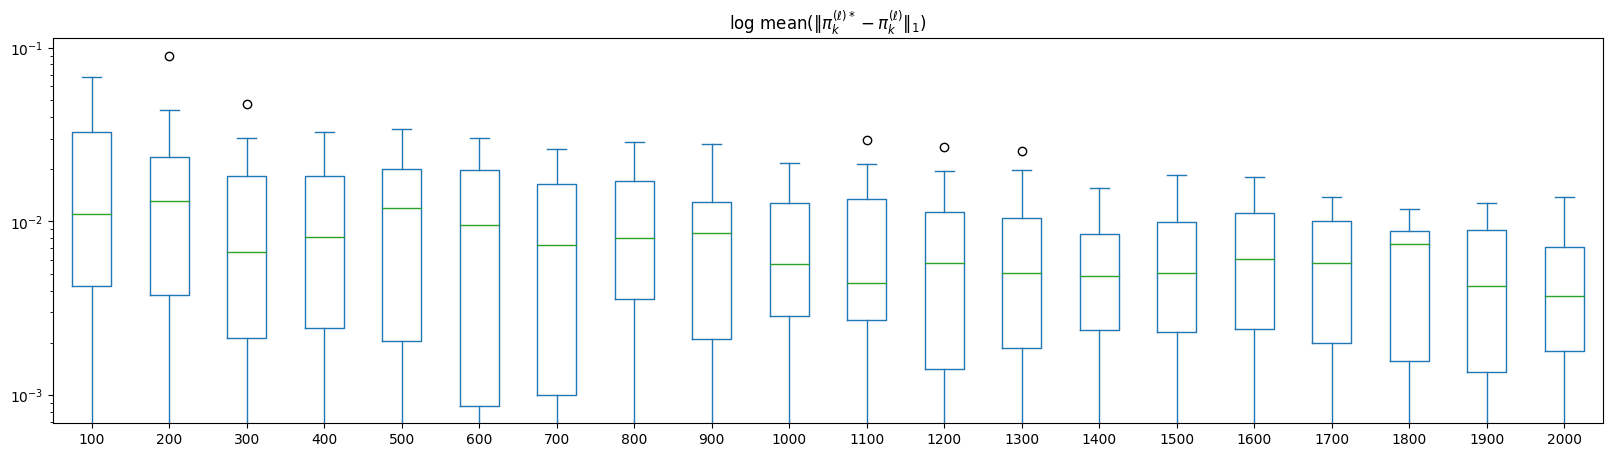

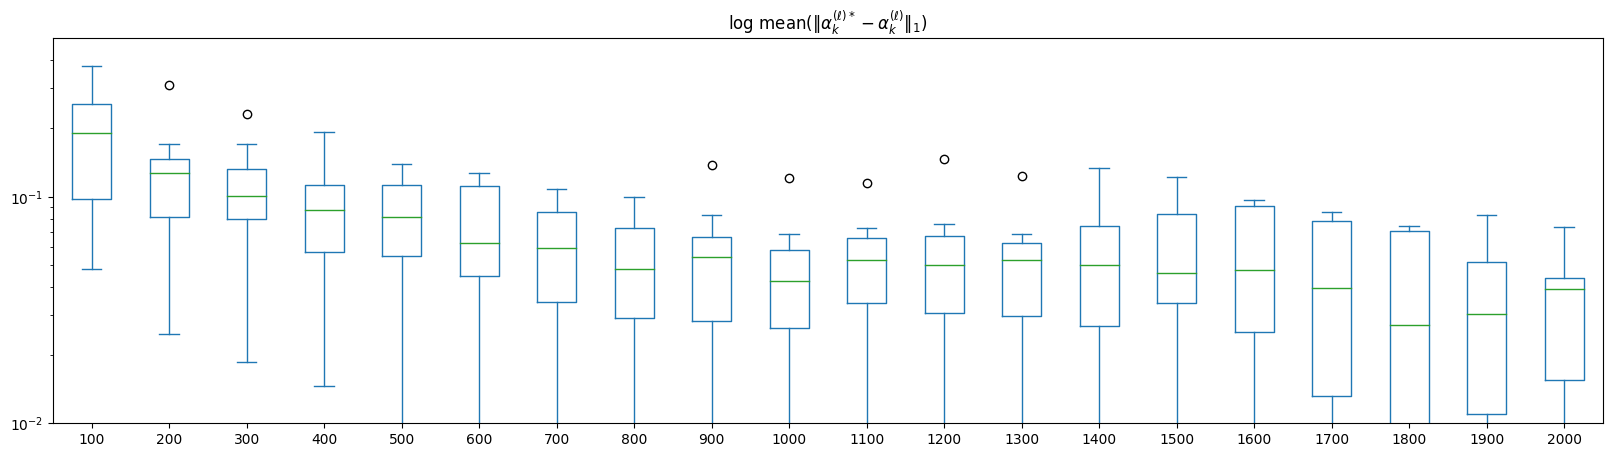

In [12]:
import pandas as pd

fig, axs = plt.subplots(figsize=(20,5))

df_activation_proba = pd.DataFrame(df_activation_proba)
df_activation_proba_mean = df_activation_proba.apply(lambda x: np.mean(x, axis=0))
df_activation_proba_mean.plot(kind='box', title='log mean($\Vert \pi_k^{(\ell)*} - \pi_k^{(\ell)} \Vert_1$)', logy=True, ax=axs)
#axs.set_xticks([0, 25, 50, 75, 100, 125, 150, 175, 200])

fig, axs = plt.subplots(figsize=(20,5))
df_dirichlet_params = pd.DataFrame(df_dirichlet_params)
non_dirichlets = []
for node in global_tree.nodes:
    if node.countChildren() <= 1:
        non_dirichlets.append(node.index)
df_dirichlet_params_mean = df_dirichlet_params.apply(lambda x: x.mean())
df_dirichlet_params_mean.drop(index=non_dirichlets, inplace=True)
df_dirichlet_params_mean.plot(kind='box', title='log mean($\Vert \\alpha_k^{(\ell)*} - \\alpha_k^{(\ell)} \Vert_1$)', logy=True, ax=axs, ylim=10e-3)

plt.show()